Dans le processus précédent, le fichier a été utilisé pour extraire des données, qui ont ensuite été sauvegardées au format pickle. Maintenant, il est temps d'importer ces données et de développer des algorithmes d'apprentissage automatique.

In [ ]:
import pickle 
# Ouverture du fichier 'labels_array.pkl' que j'ai enregistré dans le fichier précédent
# il faut bien vérifier le chemin où se trouve le labels_array  
with open('/content/drive/My Drive/labels_array.pkl', 'rb') as f:
    # Cela va reconstituer le tableau numpy 'labels_array' sauvegardé précédemment.
    labels_array = pickle.load(f)

In [ ]:
# Même processus pour data_array32.
with open('/content/drive/My Drive/data_array32.pkl', 'rb') as f:
    data_array = pickle.load(f)


In [ ]:

import numpy as np

# Définition de la fonction pour diviser les données en ensembles d'entraînement et de test
def diviser_manuellement(data, labels, test_size=0.004):
    # Calcul de la taille de l'ensemble de test basé sur le pourcentage spécifié par 'test_size'
    taille_test = int(len(data) * test_size)

    # Génération d'une permutation aléatoire des indices de 'data'
    indices = np.random.permutation(len(data))

    # Séparation des indices pour les ensembles d'entraînement et de test
    indices_train = indices[taille_test:]  # Indices pour l'entraînement
    indices_test = indices[:taille_test]  # Indices pour le test

    # Utilisation des indices pour sélectionner les données et les labels pour l'entraînement et le test
    X_train = data[indices_train]
    y_train = labels[indices_train]
    X_test = data[indices_test]
    y_test = labels[indices_test]

    # Renvoi des sous-ensembles d'entraînement et de test
    return X_train, X_test, y_train, y_test

In [ ]:
# vérification de la taille 
data_array.shape

(23168, 326, 317, 1)

In [ ]:

# Utilisation de la fonction 'diviser_manuellement' pour diviser les données en ensembles d'entraînement et de test.
# 'data_array' contient les caractéristiques et 'labels_array' les labels correspondants.
# La taille de l'ensemble de test est déterminée par la valeur par défaut de 'test_size' dans la fonction, qui est 0.004.
X_train, X_test, y_train, y_test = diviser_manuellement(data_array, labels_array)

# Après la première division, les données d'entraînement sont à nouveau divisées.
# Cette fois, une plus grande partie (10%) des données d'entraînement est mise de côté pour l'évaluation.
# 'Xx_train' et 'yy_train' sont les données d'entraînement réduites, tandis que 'Xx_eval' et 'y_eval' sont les données d'évaluation.
# Le paramètre 'test_size=0.1' spécifie que 10% des données d'entraînement sont utilisées pour l'évaluation.
Xx_train, Xx_eval, yy_train, y_eval = diviser_manuellement(X_train, y_train, test_size=0.1)


In [ ]:
X_test.shape

(92, 326, 317, 1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np
import scipy.misc
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Average, Activation, BatchNormalization, Flatten, Conv3D, AveragePooling3D, MaxPooling3D, GlobalMaxPooling3D, Dropout, Concatenate
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.python.framework.ops import EagerTensor
from tensorflow.python.keras.utils.vis_utils import plot_model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, Flatten, Dropout, Dense
from tensorflow.keras.regularizers import l2

# Fonction pour créer un modèle CNN.
def cnn_model(inputs):
    # Première couche convolutive avec régularisation L2 pour réduire le surajustement (overfitting).
    x = Conv2D(16, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001))(inputs)
    x = BatchNormalization()(x)  # Normalisation pour accélérer l'entraînement
    x = MaxPool2D(pool_size=(2, 2))(x)  # Réduction de la dimensionnalité

    # Deuxième couche convolutive.
    x = Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(2, 2))(x)

    # Troisième couche convolutive.
    x = Conv2D(64, kernel_size=(6, 6), activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(2, 2))(x)

    return x

# Définition de la forme d'entrée en fonction de  données.
input_shape = (326, 317, 1)  # Ajustez en fonction de la forme de données.

# Couche d'entrée
input_layer = Input(shape=input_shape, name='input')
cnn_out = cnn_model(input_layer)  # Application du modèle CNN à la couche d'entrée.

# Aplatir la sortie du CNN et ajouter des couches denses.
flattened = Flatten()(cnn_out)
dropped = Dropout(0.5)(flattened)  # Dropout pour réduire le surajustement
dense1 = Dense(1024, activation='relu')(dropped)  # Première couche dense
dense2 = Dense(128, activation='relu')(dense1)    # Deuxième couche dense



Ce  modèle CNN que j'ai développé,  utilise plusieurs couches convolutives avec régularisation et normalisation par lots, suivi d'un aplatissage et de couches denses. Cette architecture est courante dans les applications de vision par ordinateur, où les couches convolutives apprennent des caractéristiques spatiales et les couches denses effectuent la classification ou la prédiction basée sur ces caractéristiques. Le Dropout est utilisé pour minimiser le surajustement en désactivant aléatoirement certains neurones pendant l'entraînement.  

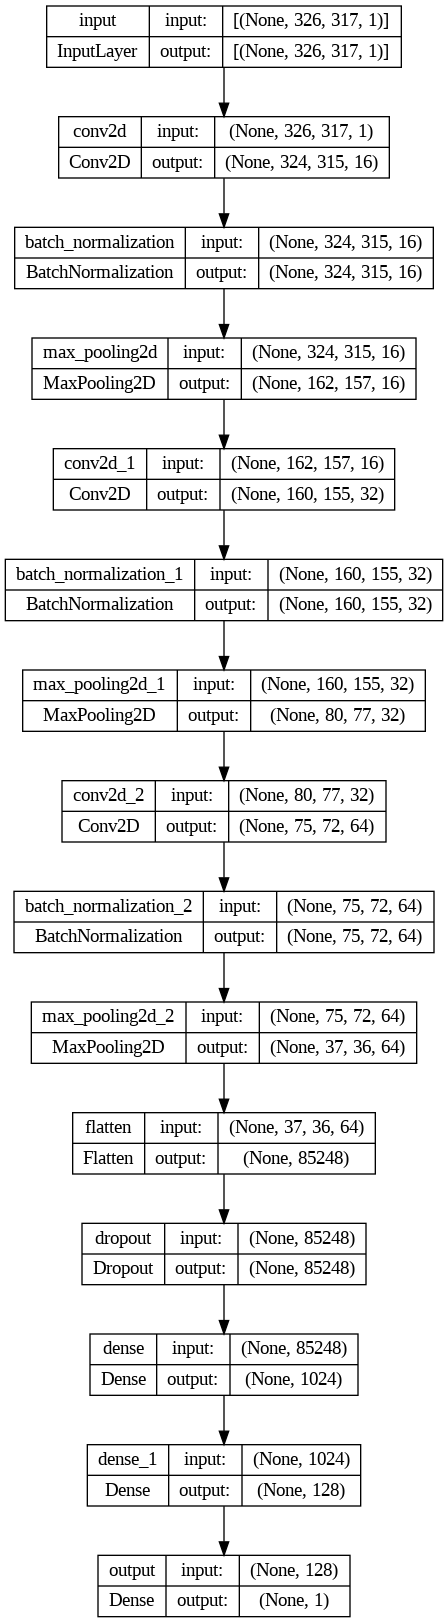

In [ ]:
output_layer = Dense(1, activation='sigmoid', name='output')(dense2)

# creation du modele
audio_cnn_model = Model(inputs=input_layer, outputs=output_layer)

# Plot l'archi du modele
plot_model(audio_cnn_model, show_shapes=True, show_layer_names=True, to_file='adapted_model.png')


In [ ]:
Xx_train.shape

(16154, 326, 317, 1)

In [ ]:
import tensorflow as tf

# Choix de l'optimiseur Adam avec un taux d'apprentissage initial de 0.001.
opt = tf.optimizers.Adam(0.001)

# Définition d'une fonction de planification du taux d'apprentissage.
# Le taux d'apprentissage est réduit de 80% tous les 5 epochs.
def lr_schedule(epoch, lr):
    if (epoch + 1) % 5 == 0:
        lr *= 0.2
    return max(lr, 3e-7)

# Choix d'un autre optimiseur, SGD, avec un taux d'apprentissage et une dynamique spécifiés.
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD')

# Compilation du modèle avec l'optimiseur Adam, la perte 'binary_crossentropy' et la métrique 'accuracy'.
audio_cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

# Création d'un callback pour arrêter l'entraînement si la perte augmente pendant 5 epochs consécutifs.
cb = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, mode='auto')

# Callback pour ajuster le taux d'apprentissage selon le plan défini.
cb_lr = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

# Entraînement du modèle avec les données et les labels, en spécifiant la taille du lot et le nombre d'epochs.
# Le callback EarlyStopping est utilisé pour surveiller la performance du modèle.
history = audio_cnn_model.fit(data_array, labels_array, batch_size=16, epochs=50, callbacks=[cb])


Epoch 1/50
1448/1448 [==============================] - 39s 22ms/step - loss: 0.7539 - accuracy: 0.8668
Epoch 2/50
1448/1448 [==============================] - 32s 22ms/step - loss: 0.2355 - accuracy: 0.9396
Epoch 3/50
1448/1448 [==============================] - 32s 22ms/step - loss: 0.2598 - accuracy: 0.9378
Epoch 4/50
1448/1448 [==============================] - 32s 22ms/step - loss: 0.2559 - accuracy: 0.9382
Epoch 5/50
1448/1448 [==============================] - 32s 22ms/step - loss: 0.1761 - accuracy: 0.9558
Epoch 6/50
1448/1448 [==============================] - 32s 22ms/step - loss: 0.1629 - accuracy: 0.9556
Epoch 7/50
1448/1448 [==============================] - 32s 22ms/step - loss: 0.1457 - accuracy: 0.9595
Epoch 8/50
1448/1448 [==============================] - 32s 22ms/step - loss: 0.1465 - accuracy: 0.9608
Epoch 9/50
1448/1448 [==============================] - 32s 22ms/step - loss: 0.1456 - accuracy: 0.9614
Epoch 10/50
1448/1448 [==============================] - 32s 22m

In [ ]:
# Enregistrement du modèle CNN dans un fichier .h5 pour une utilisation ultérieure.
audio_cnn_model.save('/content/drive/My Drive/2D.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


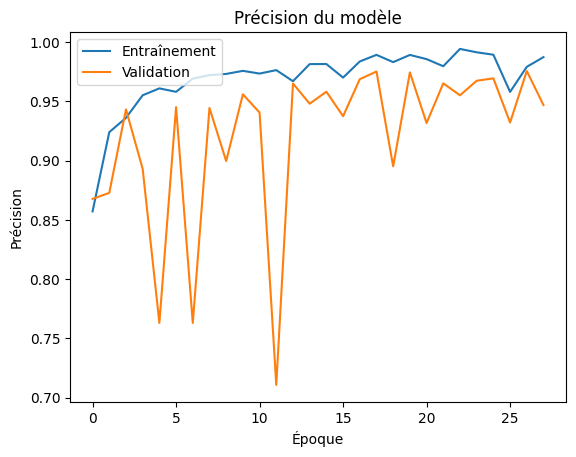

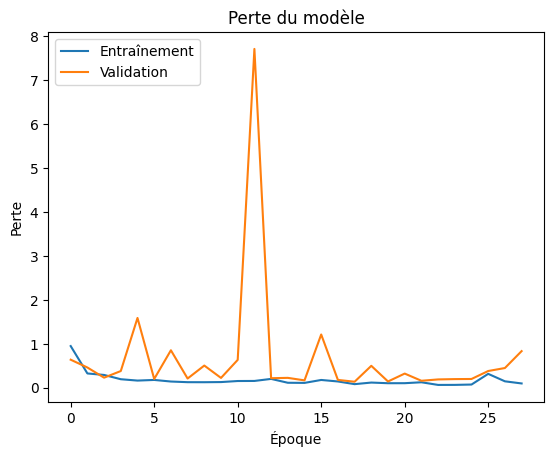

In [ ]:
import matplotlib.pyplot as plt

# Tracer la précision
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Époque')
plt.legend(['Entraînement', 'Validation'], loc='upper left')
plt.show()

# Tracer la perte
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perte du modèle')
plt.ylabel('Perte')
plt.xlabel('Époque')
plt.legend(['Entraînement', 'Validation'], loc='upper left')
plt.show()

Bien que j'aie obtenu un score de 0.90 avec cette architecture, il y a toujours un problème de surapprentissage. Malgré mes tentatives de modifications et d'ajouts des techniques( drop, maxpool, l1, L2), le problème persiste. Les architectures reconnues pour réduire le surapprentissage dans le traitement d'images sont les ResNets. Ainsi, j'ai décidé d'utiliser la architecture Resnet50 issue de la famille des ResNets qui est dans dans le section ci-dessous.

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
import tensorflow as tf

# Création d'un tenseur d'entrée adapté à la forme de mes données.
input_tensor = Input(shape=(326, 317, 1))

# Initialisation de ResNet50 sans poids pré-entraînés, adaptée à mon tenseur d'entrée.
base_model = ResNet50(weights=None, include_top=False, input_tensor=input_tensor)

# Ajout de couches pour connecter ResNet50 à mon problème spécifique.
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
predictions = Dense(1, activation='sigmoid')(x)

# Création du modèle final.
model = Model(inputs=base_model.input, outputs=predictions)

# Configuration de l'entraînement avec un callback d'arrêt précoce.
cb = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, mode='auto')
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics='accuracy')

# Entraînement du modèle avec mes données.
history = model.fit(Xx_train, yy_train, batch_size=16, validation_data=(Xx_eval, y_eval),
                    epochs=50, callbacks=[cb])



Epoch 1/50
1299/1299 [==============================] - 473s 333ms/step - loss: 1.2086 - accuracy: 0.8425 - val_loss: 0.9151 - val_accuracy: 0.9103
Epoch 2/50
1299/1299 [==============================] - 429s 330ms/step - loss: 0.6652 - accuracy: 0.9247 - val_loss: 0.5539 - val_accuracy: 0.9181
Epoch 3/50
1299/1299 [==============================] - 429s 330ms/step - loss: 0.4057 - accuracy: 0.9403 - val_loss: 0.3716 - val_accuracy: 0.9367
Epoch 4/50
1299/1299 [==============================] - 429s 330ms/step - loss: 0.2483 - accuracy: 0.9521 - val_loss: 0.5041 - val_accuracy: 0.7859
Epoch 5/50
1299/1299 [==============================] - 429s 330ms/step - loss: 0.1696 - accuracy: 0.9550 - val_loss: 0.2997 - val_accuracy: 0.8821
Epoch 6/50
1299/1299 [==============================] - 429s 330ms/step - loss: 0.1346 - accuracy: 0.9604 - val_loss: 0.3403 - val_accuracy: 0.8674
Epoch 7/50
1299/1299 [==============================] - 429s 330ms/step - loss: 0.1071 - accuracy: 0.9660 - val_

J'ai évalué mon modèle sur un ensemble de données de validation pour observer son comportement, puis je l'ai réentrainé sur ces données de validation afin de le rendre plus robuste, comme elle mantre la section suivante.

In [ ]:
cb = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, mode='auto')
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics='accuracy')
history = model.fit(Xx_eval, y_eval, batch_size=16,
                    epochs=50, callbacks=[cb])


Epoch 1/50
145/145 [==============================] - 75s 327ms/step - loss: 0.0919 - accuracy: 0.9775
Epoch 2/50
145/145 [==============================] - 46s 318ms/step - loss: 0.0370 - accuracy: 0.9900
Epoch 3/50
145/145 [==============================] - 46s 318ms/step - loss: 0.0185 - accuracy: 0.9948
Epoch 4/50
145/145 [==============================] - 46s 318ms/step - loss: 0.0376 - accuracy: 0.9896
Epoch 5/50
145/145 [==============================] - 46s 318ms/step - loss: 0.0390 - accuracy: 0.9913
Epoch 6/50
145/145 [==============================] - 46s 318ms/step - loss: 0.0074 - accuracy: 0.9991
Epoch 7/50
145/145 [==============================] - 46s 318ms/step - loss: 0.0060 - accuracy: 0.9996
Epoch 8/50
145/145 [==============================] - 46s 318ms/step - loss: 0.0143 - accuracy: 0.9974
Epoch 9/50
145/145 [==============================] - 46s 318ms/step - loss: 0.0055 - accuracy: 0.9996
Epoch 10/50
145/145 [==============================] - 46s 318ms/step - l

In [ ]:
# enregistrement de mon modéle sous format .h5
model.save('/content/drive/My Drive/ResNet50_V2_v2.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


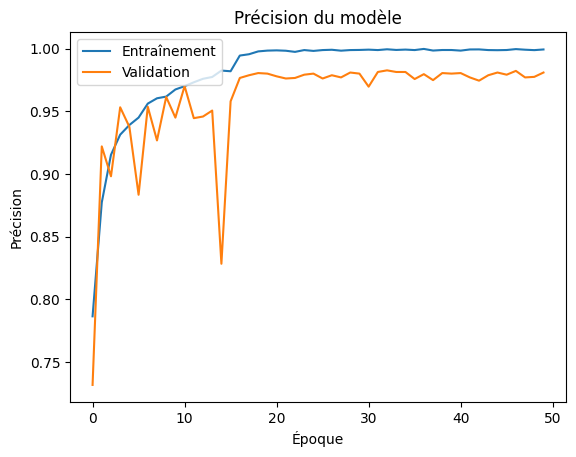

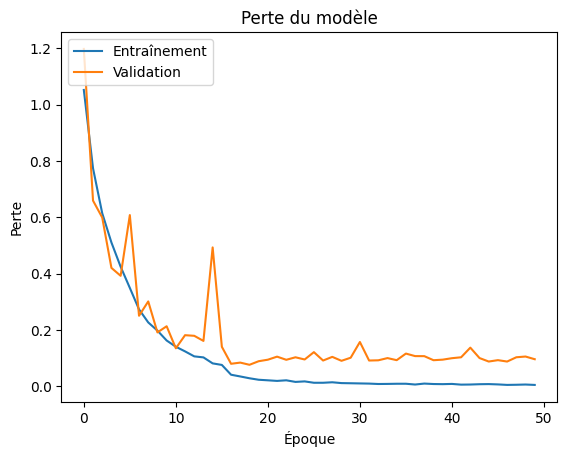

In [ ]:
import matplotlib.pyplot as plt

# Tracer la précision
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Époque')
plt.legend(['Entraînement', 'Validation'], loc='upper left')
plt.show()

# Tracer la perte
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perte du modèle')
plt.ylabel('Perte')
plt.xlabel('Époque')
plt.legend(['Entraînement', 'Validation'], loc='upper left')
plt.show()

Avec cette architecture, j'ai réussi à augmenter mon score à 0.94 tout en réduisant le problème de surapprentissage. Cependant, il subsiste encore un léger problème de surapprentissage. Je pense que les architectures ResNet100 et ResNet101 pourraient être plus efficaces que ResNet50 pour traiter ce problème.

In [ ]:
from sklearn.metrics import roc_auc_score

# Prédiction des labels pour l'ensemble de test avec le modèle entraîné.
predict = model.predict(X_test)

# Calcul du score AUC-ROC
roc_score = roc_auc_score(y_test, predict)

# Affichage du score AUC-ROC.
print("ROC Score:", roc_score)

ROC Score: 0.9985257985257985


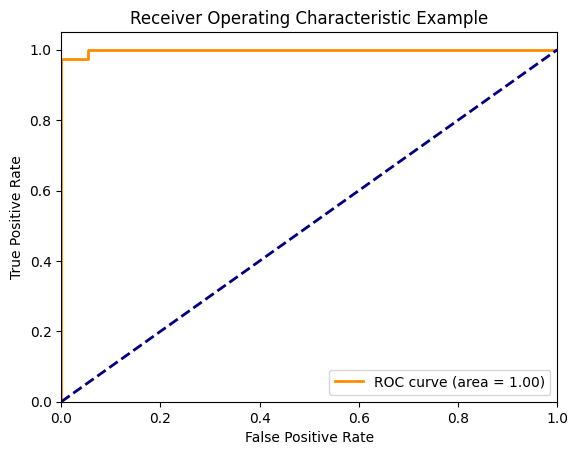

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Calculez les taux de vrais et faux positifs
fpr, tpr, thresholds = roc_curve(y_test, predict)

# Calculez l'AUC
roc_auc = roc_auc_score(y_test, predict)

# Créez le graphique
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# chargement de données de test de Data challenge
import pickle
with open('/content/drive/My Drive/X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

In [ ]:
# Affichage de la taille de test
X_test.shape

(950, 326, 317, 1)

In [ ]:

resultat= model.predict(X_test)

30/30 [==============================] - 1s 15ms/step


In [ ]:
# mettre es prédictions dans un fichier csv
import pandas as pd
data_sumbit1 =pd.read_csv("/content/drive/My Drive/sumbit.csv")
data_sumbit1
k=0
for i in list(resultat):
  for j in i:
    data_sumbit1.pos_label[k]=j
    k=k+1

<ipython-input-20-dca9f926ec48>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sumbit1.pos_label[k]=j


In [ ]:
# enregistrement de données de test de chemin spécifié
data_sumbit1.to_csv("/content/drive/My Drive/data_sumbitResNet_Advance1_v2_v2.csv", index= False)

In [ ]:
data_sumbit1

,id,pos_label
0,23168-TEST.wav,0.002405
1,23169-TEST.wav,0.012139
2,23170-TEST.wav,0.000968
3,23171-TEST.wav,0.020035
4,23172-TEST.wav,0.245334
...,...,...
945,24113-TEST.wav,0.006793
946,24114-TEST.wav,0.963069
947,24115-TEST.wav,0.995294
948,24116-TEST.wav,0.970915
